In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

In [ ]:
# Load csvs into dataframes
df2024 = pd.read_csv("/content/drive/MyDrive/Class Notes/CMSC320/HW2/Dataset Generation (2024) (Responses) - Form Responses 1.csv")
dffardina = pd.read_csv("/content/drive/MyDrive/Class Notes/CMSC320/HW2/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")
dfmax = pd.read_csv("/content/drive/MyDrive/Class Notes/CMSC320/HW2/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
dfs2025 = pd.read_csv("/content/drive/MyDrive/Class Notes/CMSC320/HW2/Dataset Generation (Spring 2025) (Responses) - Form Responses 1.csv")
dff2025 = pd.read_csv("/content/drive/MyDrive/Class Notes/CMSC320/HW2/Dataset Generation Fall2025 (Responses) - Form Responses 1.csv")

In [ ]:
# Check max percentage of NaNs
colnans = []
for df in [df2024, dffardina, dfmax, dfs2025, dff2025]:
  for col in df.columns:
    colnans.append((df[col].isna().sum()/len(df[col]) * 100))
  # print(colnans)
  # colnans = []

colnans.sort()
colnans

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.5952380952380952),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.7518796992481203),
 np.float64(0.75187969924

In [ ]:
# Rename columns
# Convention: qs are labled m and f for the gender of the person affected.
df2024.columns = ['time', 'year', 'age', 'adults_politics', 'politics', 'religious', 'gender',
                  'q1m',
                  'q2m',
                  'q3m',
                  'q4m',
                  'q5',
                  'q6m',
                  'q7m',
                  'q8m', # Q8 instead listed by gender of parent
                  'q9m',
                  'q10', # Q10 and 11 have conflicting pronouns
                  'q11', # Q10 and 11 have conflicting pronouns
                  'q12',
                  'q13f',
                  'q14m']
dffardina.columns = ['time', 'year', 'age', 'adults_politics', 'politics', 'religious', 'gender', 'compassionate',
                    'q1f',
                    'q2f',
                    'q3f',
                    'q4f',
                    'q5',
                    'q6f',
                    'q7f',
                    'q8f', # Q8 instead listed by gender of parent
                    'q9f',
                    'q10f',
                    'q11m',
                    'q12',
                    'q13f',
                    'q14f']
# Recode incorrect responses
dffardina['gender'] = dffardina['gender'].map(lambda x: 'Female' if x == 'Famale' else x)
dfmax.columns = ['time', 'year', 'age', 'adults_politics', 'politics', 'religious', 'gender',
                'q1f',
                'q2f',
                'q3f',
                'q4f',
                'q5',
                'q6f',
                'q7f',
                'q8f', # Q8 instead listed by gender of parent
                'q9f',
                'q10f',
                'q11m',
                'q12',
                'q13f',
                'q14f']
# Recode incorrect responses
dfmax['gender'] = dfmax['gender'].map(lambda x: 'Female' if x == 'Famale' else x)
dfs2025.columns = ['time', 'year', 'age', 'adults_politics', 'politics', 'religious', 'gender',
                  'q1m',
                  'q2m',
                  'q3m',
                  'q4m',
                  'q5',
                  'q6m',
                  'q7m',
                  'q8m', # Q8 instead listed by gender of parent
                  'q9m',
                  'q10', # Q10 and 11 have conflicting pronouns
                  'q11', # Q10 and 11 have conflicting pronouns
                  'q12',
                  'q13f',
                  'q14m']
dff2025.columns = ['time', 'year', 'age', 'adults_politics', 'politics', 'church', 'parents_church', 'sports', 'psports', 'gender',
                  'q1f',
                  'q2f',
                  'q3f',
                  'q4f',
                  'q5',
                  'q6f',
                  'q7f',
                  'q8f', # Q8 instead listed by gender of parent
                  'q9f',
                  'q10f',
                  'q11m',
                  'q12',
                  'q13f',
                  'q14f']

# Clean data
# dff2025
dftemp = pd.get_dummies(dff2025, columns = ['gender'])
dftemp = dftemp.drop('time', axis=1)

dftemp['year'] = dftemp['year'].map({'Freshman': 0, 'Sophmore': 1, 'Junior': 2, 'Senior': 3, 'Other': -1}) # Only 1 "other"

dftemp['age'] = dftemp['age'].apply(lambda x: 50 if x == '50+' else int(x))

dftemp['adults_politics'] = dftemp['adults_politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['politics'] = dftemp['politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['church'] = dftemp['church'].map({'Never': 0, 'Frequently': 1, 'Often': 1}) # Difference between frequently and often unknown
dftemp['parents_church'] = dftemp['parents_church'].map({'Never': 0, 'Frequently': 1, 'Often': 1}) # Difference between frequently and often unknown

dftemp['sports'] = dftemp['sports'].map({'Never': 0, 'Frequently': 1, 'Often': 1}) # Difference between frequently and often unknown
dftemp['psports'] = dftemp['psports'].map({'Never': 0, 'Frequently': 1, 'Often': 1}) # Difference between frequently and often unknown
for col in dftemp.columns[8:22]:
  dftemp[col] = dftemp[col].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

# # Map NaNs to mean
# for col in dftemp.columns:
#   dftemp[col] = dftemp[col].apply(lambda x: dftemp[dftemp[col].notna()][col].mean() if pd.isna(x) else x)

dff2025 = dftemp.copy()



# dfs2025
dftemp = pd.get_dummies(dfs2025, columns = ['gender'])
dftemp = dftemp.drop('time', axis=1)

dftemp['year'] = dftemp['year'].map({'Freshman': 0, 'Sophmore': 1, 'Junior': 2, 'Senior': 3, 'Graduate Student': 4}) # Only a few grad students, so this is probly fine

dftemp['age'] = dftemp['age'].apply(lambda x: 50 if x == '50+' else x if pd.isna(x) else int(x))

dftemp['adults_politics'] = dftemp['adults_politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['politics'] = dftemp['politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['religious'] = dftemp['religious'].map({'Not religious at all': 0, 'Somewhat religious': 1, 'Strongly religious': 2})

for col in dftemp.columns[5:19]:
  dftemp[col] = dftemp[col].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

# Map NaNs to mean
for col in dftemp.columns:
  dftemp[col] = dftemp[col].apply(lambda x: dftemp[dftemp[col].notna()][col].mean() if pd.isna(x) else x)

dfs2025 = dftemp.copy()



# dfmax
dftemp = pd.get_dummies(dfmax, columns = ['gender'])
dftemp = dftemp.drop('time', axis=1)

dftemp['year'] = dftemp['year'].map({'Freshman': 0, 'Sophmore': 1, 'Junior': 2, 'Senior': 3, 'Other': -1}) # Only 3 'Other'

dftemp['age'] = dftemp['age'].apply(lambda x: 50 if x == '50+' else x if pd.isna(x) else int(x))

dftemp['adults_politics'] = dftemp['adults_politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['politics'] = dftemp['politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['religious'] = dftemp['religious'].map({'Not spiritual at all': 0, 'Somewhat spiritual': 1, 'Strongly spiritual': 2})

for col in dftemp.columns[5:19]:
  dftemp[col] = dftemp[col].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

# # Map NaNs to mean
# for col in dftemp.columns:
#   dftemp[col] = dftemp[col].apply(lambda x: dftemp[dftemp[col].notna()][col].mean() if pd.isna(x) else x)

dfmax = dftemp.copy()



# dffardina
dftemp = pd.get_dummies(dffardina, columns = ['gender'])
dftemp = dftemp.drop('time', axis=1)

dftemp['year'] = dftemp['year'].map({'Freshman': 0, 'Sophmore': 1, 'Junior': 2, 'Senior': 3, 'Other': -1}) # Only 3 "Other"

dftemp['age'] = dftemp['age'].apply(lambda x: 50 if x == '50+' else x if pd.isna(x) else int(x))

dftemp['adults_politics'] = dftemp['adults_politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['politics'] = dftemp['politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['religious'] = dftemp['religious'].map({'Not spiritual at all': 0, 'Somewhat spiritual': 1, 'Strongly spiritual': 2})

dftemp['compassionate'] = dftemp['compassionate'].map({'Yes': 1, 'No': 0})

for col in dftemp.columns[6:20]:
  dftemp[col] = dftemp[col].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

# # Map NaNs to mean
# for col in dftemp.columns:
#   dftemp[col] = dftemp[col].apply(lambda x: dftemp[dftemp[col].notna()][col].mean() if pd.isna(x) else x)

dffardina = dftemp.copy()



# df2024
dftemp = pd.get_dummies(df2024, columns = ['gender'])
dftemp = dftemp.drop('time', axis=1)

dftemp['year'] = dftemp['year'].map({'Freshman': 0, 'Sophmore': 1, 'Junior': 2, 'Senior': 3, 'Graduate Student': 4}) # Grad student may not be perfectly numerically correct, but it's still ordinal

dftemp['adults_politics'] = dftemp['adults_politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['politics'] = dftemp['politics'].map({'Strongly liberal': -2, 'Mildly liberal': -1, 'Neutral': 0, 'Mildly conservative': 1, 'Strongly conservative': 2, "Don't know / It's complicated": np.nan})

dftemp['religious'] = dftemp['religious'].map({'Not religious at all': 0, 'Somewhat religious': 1, 'Strongly religious': 2})

for col in dftemp.columns[5:19]:
  dftemp[col] = dftemp[col].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

# # Map NaNs to mean
# for col in dftemp.columns:
#   dftemp[col] = dftemp[col].apply(lambda x: dftemp[dftemp[col].notna()][col].mean() if pd.isna(x) else x)

df2024 = dftemp.copy()

In [ ]:
# PCA decomposition of variables
plt.style.use("seaborn-v0_8-pastel")

pca = PCA(svd_solver = 'auto')
scaler = StandardScaler()

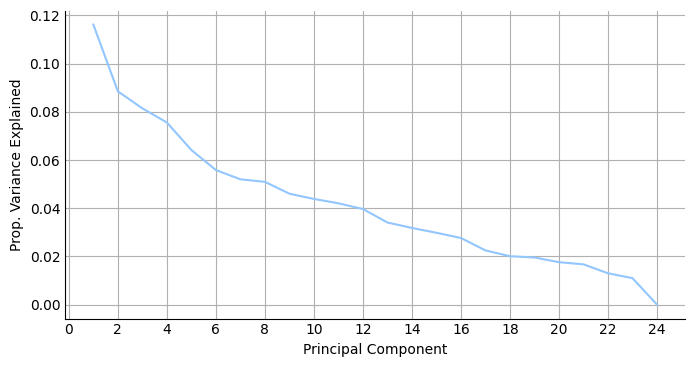

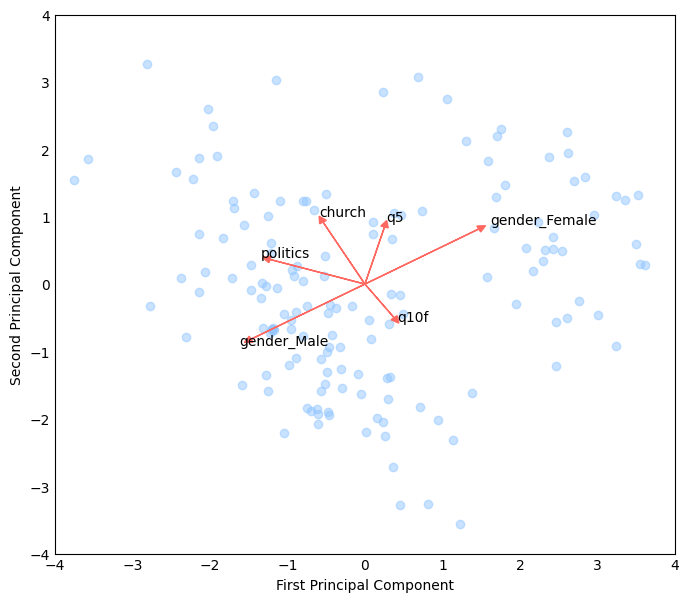

In [ ]:
# Create scree plots and scatter plots of observations in latent space
# PCA code courtesy of Deep Ray
pca.fit(scaler.fit_transform(dff2025.dropna()))

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 25), pca.explained_variance_ratio_)

plt.xticks(np.arange(0, 25, 2))
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.grid(True)
plt.show()



df_pca = pca.fit_transform(scaler.fit_transform(dff2025.dropna()))

plt.figure(figsize=(8, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

loadings = pca.components_

for i in [22, 23, 3, 4, 12, 17]:
    plt.arrow(0, 0, loadings[0, i] * 3, loadings[1, i] * 3, color = '#FF6961', head_width=0.1, head_length=0.1, alpha=1)
    plt.text(loadings[0, i] * 3.3, loadings[1, i] * 3.3, dff2025.columns[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

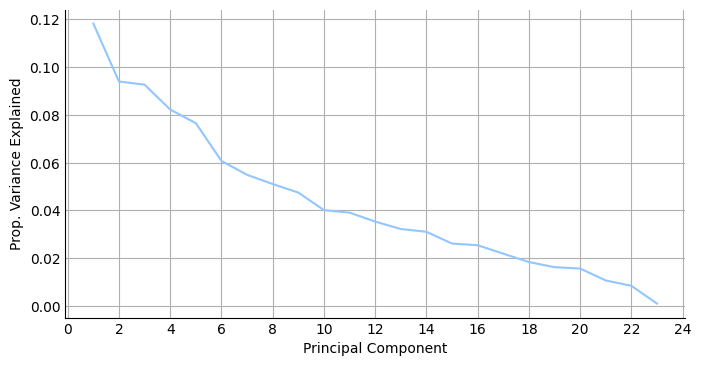

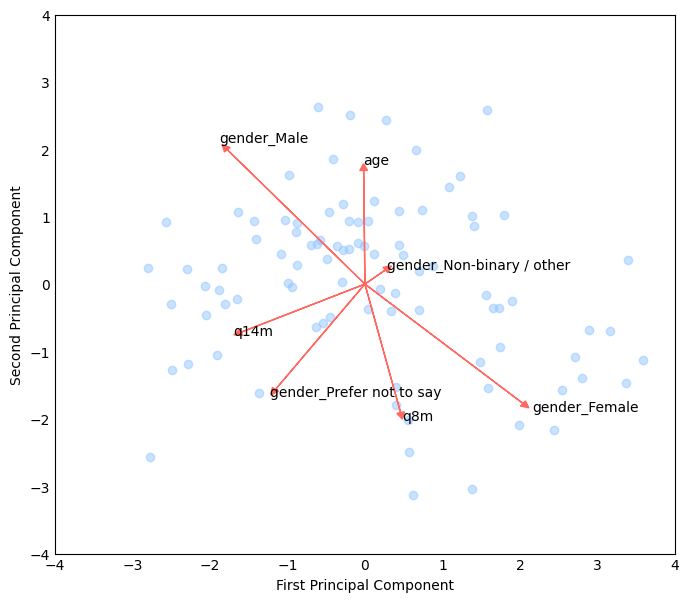

In [ ]:
pca.fit(scaler.fit_transform(dfs2025.dropna()))

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 24), pca.explained_variance_ratio_)

plt.xticks(np.arange(0, 25, 2))
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.grid(True)
plt.show()



df_pca = pca.fit_transform(scaler.fit_transform(dfs2025.dropna()))

plt.figure(figsize=(8, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

loadings = pca.components_

# for i in range(loadings.shape[1]):
for i in [1, 19, 20, 21, 22, 18, 12]:
    plt.arrow(0, 0, loadings[0, i] * 5, loadings[1, i] * 5, color = '#FF6961', head_width=0.1, head_length=0.1, alpha=1)
    plt.text(loadings[0, i] * 5.3, loadings[1, i] * 5.3, dfs2025.columns[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

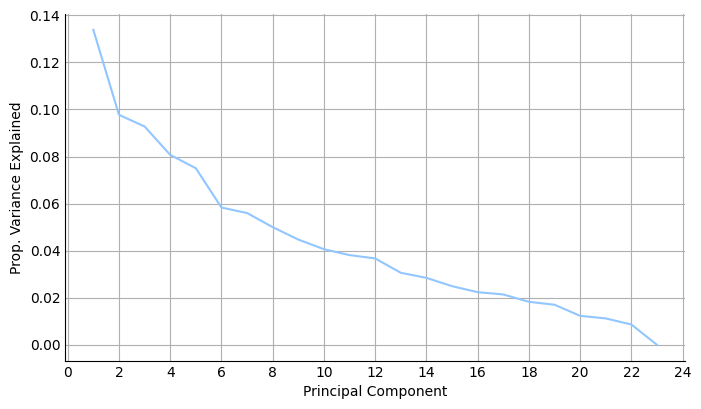

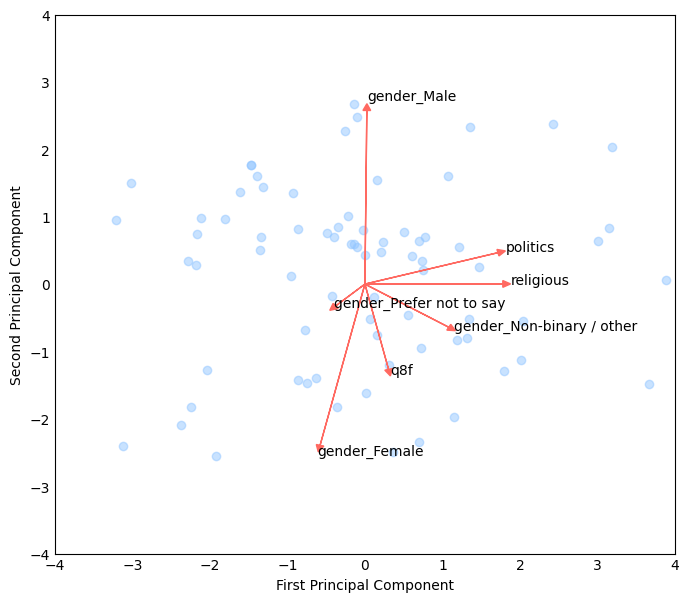

In [ ]:
pca.fit(scaler.fit_transform(dfmax.dropna()))

plt.figure(figsize=(8, 4.5))
plt.plot(np.arange(1, 24), pca.explained_variance_ratio_)

plt.xticks(np.arange(0, 25, 2))
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.grid(True)
plt.show()



df_pca = pca.fit_transform(scaler.fit_transform(dfmax.dropna()))

plt.figure(figsize=(8, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

loadings = pca.components_

# for i in range(loadings.shape[1]):
for i in [19, 20, 21, 22, 3, 4, 12]:
    plt.arrow(0, 0, loadings[0, i] * 5, loadings[1, i] * 5, color = '#FF6961', head_width=0.1, head_length=0.1, alpha=1)
    plt.text(loadings[0, i] * 5.3, loadings[1, i] * 5.3, dfmax.columns[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

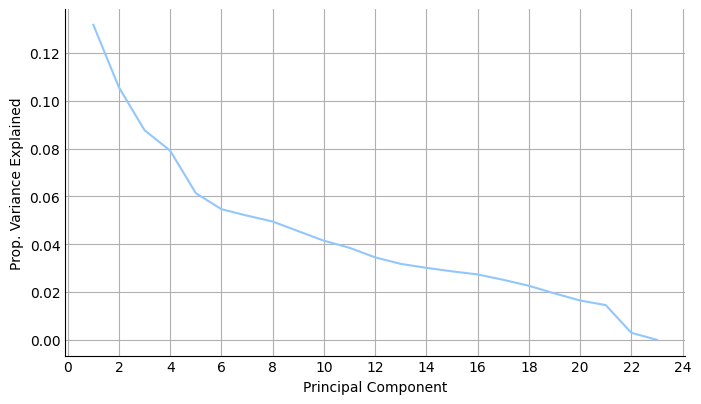

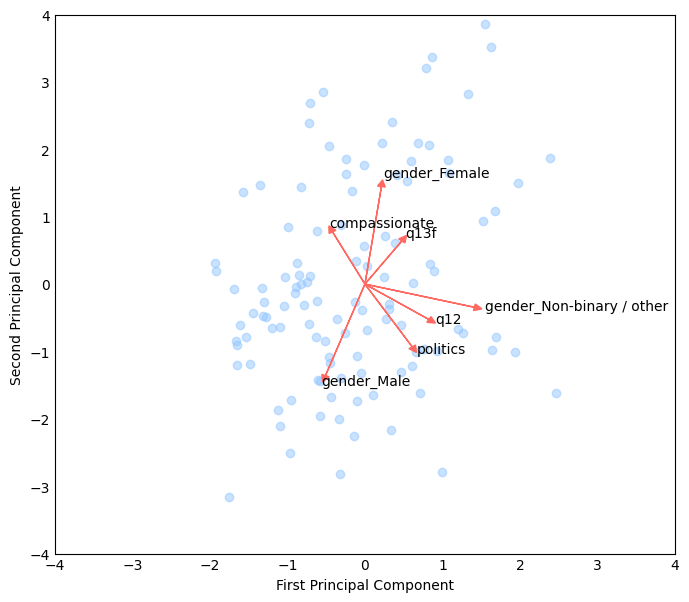

In [ ]:
pca.fit(scaler.fit_transform(dffardina.dropna()))

plt.figure(figsize=(8, 4.5))
plt.plot(np.arange(1, 24), pca.explained_variance_ratio_)

plt.xticks(np.arange(0, 25, 2))
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.grid(True)
plt.show()



df_pca = pca.fit_transform(scaler.fit_transform(dffardina.dropna()))

plt.figure(figsize=(8, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

loadings = pca.components_

# for i in range(loadings.shape[1]):
for i in [20, 21, 22, 3, 5, 18, 17]:
    plt.arrow(0, 0, loadings[0, i] * 3, loadings[1, i] * 3, color = '#FF6961', head_width=0.1, head_length=0.1, alpha=1)
    plt.text(loadings[0, i] * 3.3, loadings[1, i] * 3.3, dffardina.columns[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

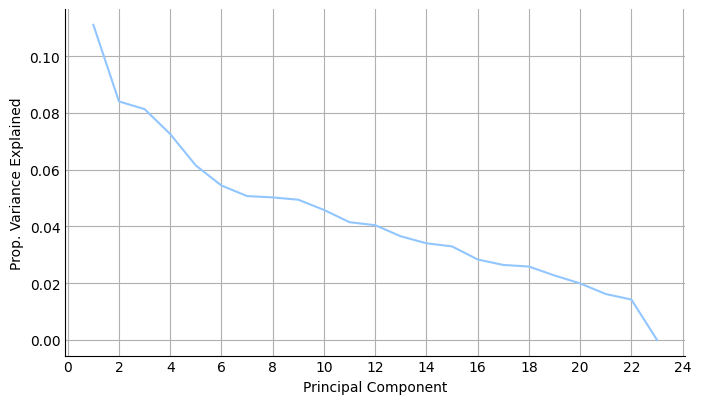

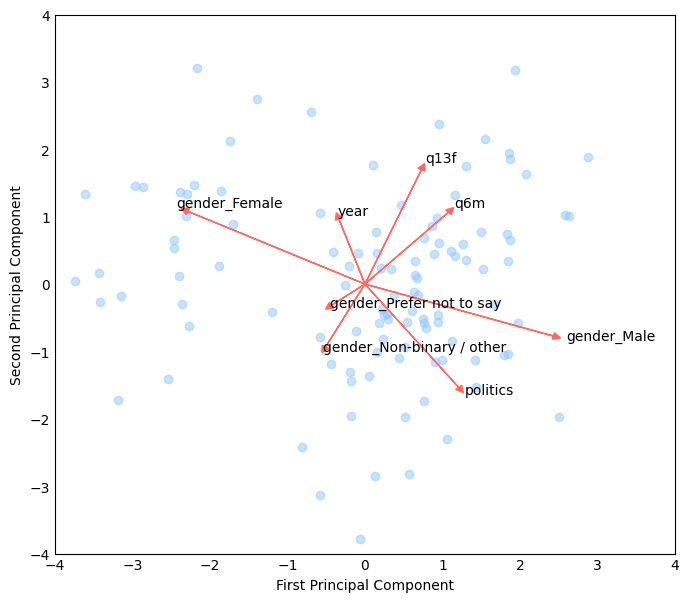

In [ ]:
pca.fit(scaler.fit_transform(df2024.dropna()))

plt.figure(figsize=(8, 4.5))
plt.plot(np.arange(1, 24), pca.explained_variance_ratio_)

plt.xticks(np.arange(0, 25, 2))
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.grid(True)
plt.show()



df_pca = pca.fit_transform(scaler.fit_transform(df2024.dropna()))

plt.figure(figsize=(8, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

loadings = pca.components_

# for i in range(loadings.shape[1]):
for i in [19, 20, 21, 22, 0, 3, 17, 10]:
    plt.arrow(0, 0, loadings[0, i] * 4.5, loadings[1, i] * 4.5, color = '#FF6961', head_width=0.1, head_length=0.1, alpha=1)
    plt.text(loadings[0, i] * 4.8, loadings[1, i] * 4.8, df2024.columns[i])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

In [ ]:
# Testing difference in responses between each survey except the primed one

# Sanity check for if the non-primed group themselves show a difference in distributions
# _, p = kruskal(df2024['q5'], dfmax['q5'], dfs2025['q5'], dff2025['q5'], nan_policy='omit')
# print(f"P-value on q5: {p}")

_, p = kruskal(df2024['q5'], dfmax['q5'], dfs2025['q5'], dff2025['q5'], dffardina['q5'], nan_policy='omit')
print(f"P-value on q5 (with priming): {p}")

# _, p = kruskal(df2024['q12'], dfmax['q12'], dfs2025['q12'], dff2025['q12'], nan_policy='omit')
# print(f"P-value on q12: {p}")
_, p = kruskal(df2024['q12'], dfmax['q12'], dfs2025['q12'], dff2025['q12'], dffardina['q12'], nan_policy='omit')
print(f"P-value on q12 (with priming): {p}")

P-value on q5 (with priming): 0.11341683515002152
P-value on q12 (with priming): 0.11243747941220499


In [ ]:
# Test if males and females respond differently
fresponses = []
mresponses = []

cols = list(range(8, 22))
cols.remove(12)
cols.remove(19)

for i in cols:
  fresponses.extend(dff2025[dff2025['gender_Female']][dff2025.columns[i]].dropna().tolist())
  mresponses.extend(dff2025[dff2025['gender_Female'] != True][dff2025.columns[i]].dropna().tolist())

_, p = mannwhitneyu(fresponses, mresponses, alternative='two-sided')
print(f"P-value on gender: {p}")

# list(enumerate(dff2025.columns))

P-value on gender: 0.11418157134907915


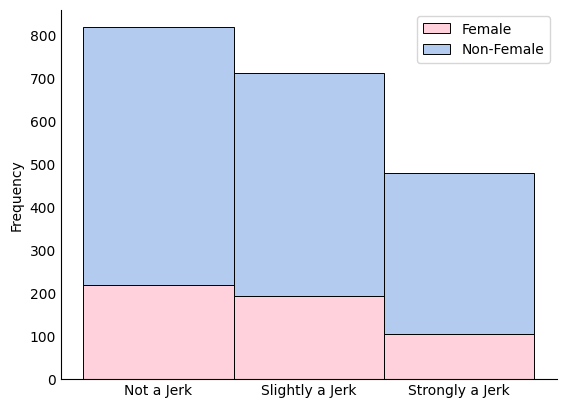

In [ ]:
# Plot the most significantly different distribution

# print(pd.Series(fresponses).value_counts())
# print(pd.Series(mresponses).value_counts())

plt.hist([fresponses, mresponses], bins = [-0.5, 0.5, 1.5, 2.5], label=['Female', 'Non-Female'], color=['#FFD1DC', '#B4CBF0'], histtype='barstacked', rwidth=1, edgecolor='black', linewidth = 0.7)

plt.xticks([0, 1, 2], ['Not a Jerk', 'Slightly a Jerk', 'Strongly a Jerk'])
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)

plt.ylabel('Frequency')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()

plt.show()

# For some reason my plots are not showing up correctly in the PDF, but all plots are in the pdf report.

In [ ]:
fresponses = []
mresponses = []

cols = list(range(5, 19))
cols.remove(9)
cols.remove(14)
cols.remove(15)
cols.remove(16)

for i in cols:
  mresponses.extend(dfs2025[dfs2025['gender_Male']][dfs2025.columns[i]].dropna().tolist())
  fresponses.extend(dfs2025[dfs2025['gender_Male'] != True][dfs2025.columns[i]].dropna().tolist())

_, p = mannwhitneyu(fresponses, mresponses, alternative='two-sided')
print(f"P-value on gender: {p}")

# list(enumerate(dfs2025.columns))

P-value on gender: 0.15965374660463083


In [ ]:
fresponses = []
mresponses = []

cols = list(range(5, 19))
cols.remove(9)
cols.remove(16)

for i in cols:
  fresponses.extend(dfmax[dfmax['gender_Female']][dfmax.columns[i]].dropna().tolist())
  mresponses.extend(dfmax[dfmax['gender_Female'] != True][dfmax.columns[i]].dropna().tolist())

_, p = mannwhitneyu(fresponses, mresponses, alternative='two-sided')
print(f"P-value on gender: {p}")

# list(enumerate(dfmax.columns))

P-value on gender: 0.892978801589325


In [ ]:
fresponses = []
mresponses = []

cols = list(range(6, 20))
cols.remove(10)
cols.remove(17)

for i in cols:
  fresponses.extend(dffardina[dffardina['gender_Female']][dffardina.columns[i]].dropna().tolist())
  mresponses.extend(dffardina[dffardina['gender_Female'] != True][dffardina.columns[i]].dropna().tolist())

_, p = mannwhitneyu(fresponses, mresponses, alternative='two-sided')
print(f"P-value on gender: {p}")

# list(enumerate(dffardina.columns))

P-value on gender: 0.18121700042996847


In [ ]:
# test compassionate against genders

# Since there's only 1 Non-binary/other, that isn't enough to do hypothesis testing on that group. So I'll just concern myself with Male vs Female
# dffardina['gender_Non-binary / other'].value_counts()

_, p = mannwhitneyu(dffardina[dffardina['gender_Female']]['compassionate'].dropna(), dffardina[dffardina['gender_Male']]['compassionate'].dropna(), alternative='two-sided')
print(f"P-value on gender: {p}")

P-value on gender: 0.5654827840131718


In [ ]:
fresponses = []
mresponses = []

cols = list(range(5, 19))
cols.remove(9)
cols.remove(14)
cols.remove(15)
cols.remove(16)

for i in cols:
  mresponses.extend(df2024[df2024['gender_Male']][df2024.columns[i]].dropna().tolist())
  fresponses.extend(df2024[df2024['gender_Male'] != True][df2024.columns[i]].dropna().tolist())

_, p = mannwhitneyu(fresponses, mresponses, alternative='two-sided')
print(f"P-value on gender: {p}")

# list(enumerate(df2024.columns))

P-value on gender: 0.22765915833893302


In [ ]:
# Checking non male/female responses to see if they are in sufficient number to cause trouble when dropped
list(enumerate(df2024.columns))
print(df2024['gender_Non-binary / other'].sum() + df2024['gender_Prefer not to say'].sum())

print(dfs2025['gender_Non-binary / other'].sum() + dfs2025['gender_Prefer not to say'].sum())

print(dffardina['gender_Non-binary / other'].sum())

print(dfmax['gender_Non-binary / other'].sum() + dfmax['gender_Prefer not to say'].sum())

2
3
1
9
